<a id='QAOA_example'></a>
**Toy example of QAOA**

A simple example of QAOA for the 1D classical Ising model.
We consider the case of two spin (N = 2) with no local magnetic fields.
I.e, h_0 = h_1 = 1

The Hamiltonian has the form <br>
H = -z_1 z_2

Adapted from https://pennylane.ai/qml/demos/tutorial_qaoa_intro/

----------

By Damian Pope, PhD

<i>Introduction to Quantum  Machine Learning</i> lecture




In [1]:
!pip install pennylane

Defaulting to user installation because normal site-packages is not writeable


In [2]:
"""
PennyLane code for a simple example of QAOA
https://pennylane.ai/
"""

import pennylane as qml
from pennylane import qaoa
from pennylane import numpy as np
from matplotlib import pyplot as plt

#
#Create Hamiltonian for the quantum Ising model.
#It's based on the classical Hamiltonian: H = - z_1 z_2
#
H_Ising = qml.Hamiltonian(
    [-1],
    [qml.PauliZ(0) @ qml.PauliZ(1)]
)
print(f"H_Ising={H_Ising}")

#Create the "simple" Hamilonian (H_s) that we start in the ground state of
H_s = qml.Hamiltonian(
    [1,1],
    [qml.PauliX(0), qml.PauliX(1)])

print(f"H_s={H_s}")

H_Ising=-1 * (Z(0) @ Z(1))
H_s=1 * X(0) + 1 * X(1)


Implement QAOA with H_Ising and H_s

In [3]:
#Define the basic combination of implementing H_Ising and H_s that we will repeat a number of times (M times)
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, H_Ising)
    qaoa.mixer_layer(alpha, H_s)



#wires is the set of all the qubits.
#It's just [0,1] for qubit 0 and qubit 1.
wires = range(2)

#M is the number of times we repeat the combination (or layer) of H_s & H_Ising
M = 1

#define the circuit that implements QAOA
def circuit(params, **kwargs):

    #First, initialize the state to the ground state of H_s
    for w in wires:
        qml.PauliX(wires=w)
        qml.Hadamard(wires=w)

    #Implement H_s and H_Ising M times
    qml.layer(qaoa_layer, M, params[0], params[1])




Create the classical optimization procedure using gradient descent.

In [4]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(H_Ising)

optimizer = qml.GradientDescentOptimizer()
steps = 1

params = np.array([[0.5], [0.5]], requires_grad=True)






Run the QAOA algorithm and determine the optimal parameters.

In [5]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print(f"Optimal Parameters={params}")




Optimal Parameters=[[0.50982591]
 [0.48599298]]


Simulate running the algorithms a number of times and sampling the probability distribution of outcomes for the final optimzed values of the 2M time parameters.

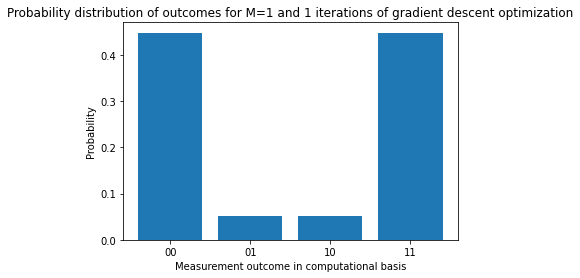

In [6]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

#Display a bar graph showing the probability of measuring each bitstring
plt.bar(['00','01','10','11'], probs)
plt.title(f"Probability distribution of outcomes for M={M} and {steps} iterations of gradient descent optimization")
plt.ylabel("Probability")
plt.xlabel("Measurement outcome in computational basis")
plt.show()

To calculate the ground state of H, we need to calculate the energy of the most likely outcome. E.g., if the most likely outcome is z_1 = z_2 = 0, then the ground-state energy is H = -(1) (1) = -1 (We could also use the other ground state and calculate H = -(-1) (-1) = -1)

Repeat the algorithm with more classical optimization iterations. You can see the two ground states (00 and 11) have higher probabilities. Notice also that the probabilities of the two non-ground states (01 and 10) decrease.

Optimal Parameters=[[0.5567707 ]
 [0.43724665]]


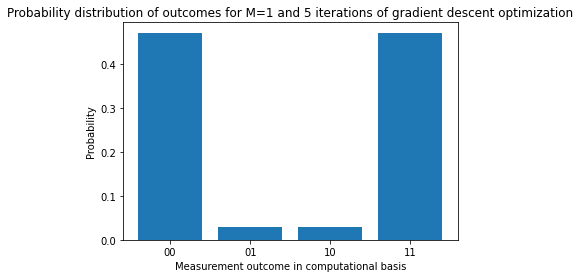

In [7]:
steps = 5

for i in range(steps):
    params = optimizer.step(cost_function, params)

print(f"Optimal Parameters={params}")


probs = probability_circuit(params[0], params[1])


######################################################################
#
# Finally, we can display a bar graph showing the probability of
# measuring each bitstring:

plt.bar(['00','01','10','11'], probs)
plt.title(f"Probability distribution of outcomes for M={M} and {steps} iterations of gradient descent optimization")
plt.ylabel("Probability")
plt.xlabel("Measurement outcome in computational basis")
plt.show()

Increase the number of classical optimization iterations even more. The probabilities of the non-ground states decrease even more.

Optimal Parameters=[[0.37066935 0.61057482]
 [0.32843199 0.21787552]]


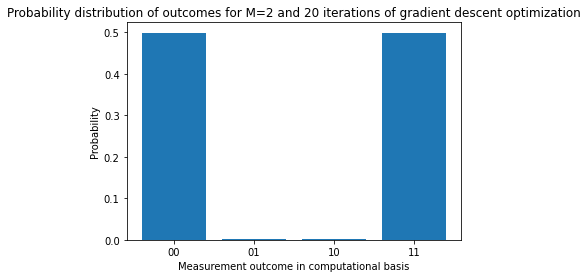

In [8]:
M = 2
steps = 20

params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

for i in range(steps):
    params = optimizer.step(cost_function, params)

print(f"Optimal Parameters={params}")

probs = probability_circuit(params[0], params[1])

######################################################################
#
# Finally, we can display a bar graph showing the probability of
# measuring each bitstring:

plt.bar(['00','01','10','11'], probs)
plt.title(f"Probability distribution of outcomes for M={M} and {steps} iterations of gradient descent optimization")
plt.ylabel("Probability")
plt.xlabel("Measurement outcome in computational basis")
plt.show()